# Testing Functions

In [1]:
import pandas as pd
import os
os.chdir("C:/Users/BpAmos/Documents/repos/directional-survey-converter/")

from src.dataclass import *
from src.directional_survey import *


In [2]:
# load data
file = "C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/Well_A_Dir_Survey.csv"

df = pd.read_csv(file, sep=',')

file = "C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/well_surface_location.csv"
df_surface = pd.read_csv(file, sep=',')
df_surface.tail()

df = pd.merge(df,df_surface,on="UWI")

df.rename(columns={'UWI':'wellId',
                   'Measured Depth':'md',
                   'Deviation Angle':'inc',
                   'Deviation Azimuth':'azim',
                   'TV Depth':'tvd',
                   'Deviation N/S':'n_s_deviation',
                   'N/S':'n_s',
                   'Deviation E/W':'e_w_deviation',
                   'E/W':'e_w',
                   'Surface Latitude':'surface_latitude',
                   'Surface Longitude':'surface_longitude',},inplace=True)

df.tail()

,wellId,md,tvd,inc,azim,n_s_deviation,n_s,e_w_deviation,e_w,PRODFit Formation Code,PRODFit Formation Name,Point Type Code,Point Type Name,surface_latitude,surface_longitude
36,Well_A,9099,8023.49,91.1,226.5,907.19,S,891.66,W,NaN,NaN,NaN,NaN,33.438389,-97.482414
37,Well_A,9161,8021.59,92.4,226.1,950.00,S,936.47,W,NaN,NaN,NaN,NaN,33.438389,-97.482414
38,Well_A,9224,8019.34,91.7,226.5,993.50,S,981.98,W,NaN,NaN,NaN,NaN,33.438389,-97.482414
39,Well_A,9285,8017.05,92.6,226.1,1035.62,S,1026.05,W,NaN,NaN,NaN,NaN,33.438389,-97.482414
40,Well_A,9328,8015.10,92.6,226.1,1065.40,S,1057.00,W,NaN,NaN,PE,"PROJECTED, END POINT",33.438389,-97.482414


In [2]:
# load data
file = "C:/Users/BpAmos/Documents/repos/directional-survey-converter/data/well_test_survey.csv"

df = pd.read_csv(file, sep=',')

df.rename(columns={'wellId':'wellId',
                   'MD':'md',
                   'Inclination':'inc',
                   'Azimuth':'azim',
                   'TVD':'tvd',
                   'North':'n_s_deviation',
                   'East':'e_w_deviation',
                   'surface_latitude':'surface_latitude',
                   'surface_longitudte':'surface_longitude',},inplace=True)

#df['n_s']='n'
#df['e_w']='e'

df.tail().T

,95,96,97,98,99
wellId,well_B,well_B,well_B,well_B,well_B
md,8566,8663,8756,8855,8945
inc,88.72,88.22,88.26,89.15,89.89
azim,170.5,169.43,170.22,173.14,174.14
tvd,7434.69,7437.28,7440.13,7442.37,7443.12
TVDSS,7287.69,7290.28,7293.13,7295.37,7296.12
n_s_deviation,-1464.53,-1560.01,-1651.5,-1749.42,-1838.87
e_w_deviation,333.96,350.85,367.28,381.6,391.56
Grid East,778082,778087,778092,778096,778099
Grid North,3.30757e+06,3.30754e+06,3.30752e+06,3.30749e+06,3.30746e+06


In [3]:
# create dataframe of interest


my_df = df
#my_df = df[['wellId','md','inc','azim','surface_latitude', 'surface_longitude']]
my_df.head()

,wellId,md,inc,azim,tvd,TVDSS,n_s_deviation,e_w_deviation,Grid East,Grid North,...,Turn Rate,Vert Sect,Major Semi,Minor Semi,Vert Semi,Minor Azim,Lat_dec,Lon_dec,surface_latitude,surface_longitude
0,well_B,0,0.00,143.00,0.0,-147.0,0.00,0.00,777980.00,3308019.00,...,0.00,0.00,0.0,0.0,0.00,0.00,29.871441,47.877867,29.871441,47.877867
1,well_B,26,0.00,143.00,26.0,-121.0,0.00,0.00,777980.00,3308019.00,...,0.00,0.00,40.2,40.2,6.32,0.00,NaN,NaN,29.871441,47.877867
2,well_B,113,0.04,143.00,113.0,-34.0,-0.02,0.02,777980.01,3308018.99,...,164.37,0.03,40.2,40.2,6.73,233.00,NaN,NaN,29.871441,47.877867
3,well_B,205,0.08,176.39,205.0,58.0,-0.11,0.04,777980.01,3308018.97,...,36.29,0.12,40.2,40.2,6.73,241.44,NaN,NaN,29.871441,47.877867
4,well_B,297,0.15,126.08,297.0,150.0,-0.25,0.14,777980.04,3308018.92,...,-54.68,0.26,40.2,40.2,6.73,61.32,NaN,NaN,29.871441,47.877867


In [4]:
# create survey obj

survey_dict = my_df.to_dict(orient='records')
survey_obj = Survey(survey_dict)

In [5]:
# gen lat lon survey

my_survey_lat_lon = survey_obj.get_lat_lon_from_deviation()
my_survey_lat_lon.tail()

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long


,wellId,md,inc,azim,e_w_deviation,n_s_deviation,surface_latitude,surface_longitude,x_offset,y_offset,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
95,well_B,8566,88.72,170.50,333.96,-1464.53,29.871441,47.877867,333.96,-1464.53,777979.995029,3.308019e+06,38,R,778081.786037,3.307573e+06,29.867394,47.878808
96,well_B,8663,88.22,169.43,350.85,-1560.01,29.871441,47.877867,350.85,-1560.01,777979.995029,3.308019e+06,38,R,778086.934109,3.307544e+06,29.867131,47.878853
97,well_B,8756,88.26,170.22,367.28,-1651.50,29.871441,47.877867,367.28,-1651.50,777979.995029,3.308019e+06,38,R,778091.941973,3.307516e+06,29.866879,47.878898
98,well_B,8855,89.15,173.14,381.60,-1749.42,29.871441,47.877867,381.60,-1749.42,777979.995029,3.308019e+06,38,R,778096.306709,3.307486e+06,29.866609,47.878935
99,well_B,8945,89.89,174.14,391.56,-1838.87,29.871441,47.877867,391.56,-1838.87,777979.995029,3.308019e+06,38,R,778099.342517,3.307459e+06,29.866362,47.878960


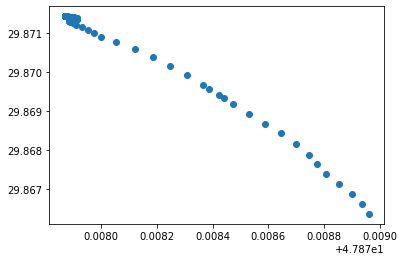

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=my_survey_lat_lon['longitude_points'], y=my_survey_lat_lon['latitude_points'])
plt.show()

# Convert with only MD, INCL, AZIM, Surface lat lon

use Minimum Curvature Algo

In [7]:
df_subset = my_survey_lat_lon[['wellId','md','inc','azim','surface_latitude','surface_longitude']]
df_subset.head()

,wellId,md,inc,azim,surface_latitude,surface_longitude
0,well_B,0,0.00,143.00,29.871441,47.877867
1,well_B,26,0.00,143.00,29.871441,47.877867
2,well_B,113,0.04,143.00,29.871441,47.877867
3,well_B,205,0.08,176.39,29.871441,47.877867
4,well_B,297,0.15,126.08,29.871441,47.877867


In [8]:
survey_dict = df_subset.to_dict(orient='records')
survey_obj = Survey(survey_dict)

In [9]:
df_min_curve = survey_obj.minimum_curvature_algo()
df_min_curve.tail()

converted surface x and y to surface lat and long
converted adjusted x and y back to lat long


,wellId,md,inc,azim,e_w_deviation,n_s_deviation,surface_latitude,surface_longitude,x_offset,y_offset,surface_x,surface_y,zone_number,zone_letter,x_points,y_points,latitude_points,longitude_points
95,well_B,8566,88.72,170.50,333.957390,-1464.530214,29.871441,47.877867,333.957390,-1464.530214,777979.995029,3.308019e+06,38,R,778081.785242,3.307573e+06,29.867394,47.878808
96,well_B,8663,88.22,169.43,350.853063,-1560.010555,29.871441,47.877867,350.853063,-1560.010555,777979.995029,3.308019e+06,38,R,778086.935043,3.307544e+06,29.867131,47.878853
97,well_B,8756,88.26,170.22,367.274001,-1651.504036,29.871441,47.877867,367.274001,-1651.504036,777979.995029,3.308019e+06,38,R,778091.940145,3.307516e+06,29.866878,47.878898
98,well_B,8855,89.15,173.14,381.593542,-1749.425566,29.871441,47.877867,381.593542,-1749.425566,777979.995029,3.308019e+06,38,R,778096.304741,3.307486e+06,29.866608,47.878935
99,well_B,8945,89.89,174.14,391.562599,-1838.866783,29.871441,47.877867,391.562599,-1838.866783,777979.995029,3.308019e+06,38,R,778099.343309,3.307459e+06,29.866362,47.878960


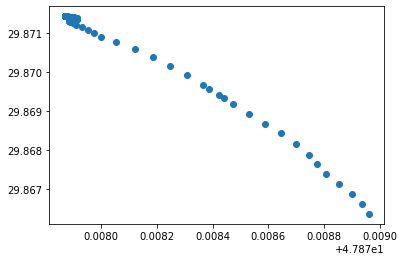

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x=df_min_curve['longitude_points'], y=df_min_curve['latitude_points'])
plt.show()

# min curve algo vs other

In [11]:
my_survey_lat_lon['wellId'] ='well_A'
df_min_curve['wellId'] ='well_B'
appended = my_survey_lat_lon.append(df_min_curve)

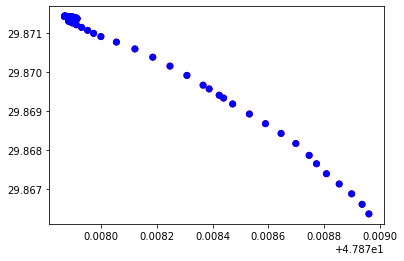

In [12]:
colors = {'well_A':'red', 'well_B':'blue'}
plt.scatter(x=appended['longitude_points'], y=appended['latitude_points'], c=appended['wellId'].apply(lambda x: colors[x]))
plt.show()